In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#Importar los datos del CSV en tres vectores
T,P,V = np.loadtxt("compresion.csv",skiprows=1,unpack=True,delimiter=";")

In [6]:
T

array([300.04, 303.91, 307.39, 310.44, 313.57, 316.96, 320.47, 322.81,
       326.31, 328.71, 332.24, 334.57, 337.86, 340.47, 342.77, 345.66,
       347.55])

In [7]:
P

array([120., 125., 130., 135., 140., 145., 150., 155., 160., 165., 170.,
       175., 180., 185., 190., 195., 200.])

In [8]:
V

array([20.78786346, 20.21345447, 19.65892428, 19.11846984, 18.62186633,
       18.17356898, 17.76241924, 17.31522361, 16.95611874, 16.56300733,
       16.24868751, 15.89485674, 15.60532433, 15.3009242 , 14.99878656,
       14.73750137, 14.44754583])

In [10]:
#para variar, importar los datos en un solo array
datos = np.loadtxt("compresion.csv",skiprows=1,delimiter=";")

In [11]:
datos

array([[300.04      , 120.        ,  20.78786346],
       [303.91      , 125.        ,  20.21345447],
       [307.39      , 130.        ,  19.65892428],
       [310.44      , 135.        ,  19.11846984],
       [313.57      , 140.        ,  18.62186633],
       [316.96      , 145.        ,  18.17356898],
       [320.47      , 150.        ,  17.76241924],
       [322.81      , 155.        ,  17.31522361],
       [326.31      , 160.        ,  16.95611874],
       [328.71      , 165.        ,  16.56300733],
       [332.24      , 170.        ,  16.24868751],
       [334.57      , 175.        ,  15.89485674],
       [337.86      , 180.        ,  15.60532433],
       [340.47      , 185.        ,  15.3009242 ],
       [342.77      , 190.        ,  14.99878656],
       [345.66      , 195.        ,  14.73750137],
       [347.55      , 200.        ,  14.44754583]])

<function matplotlib.pyplot.show(close=None, block=None)>

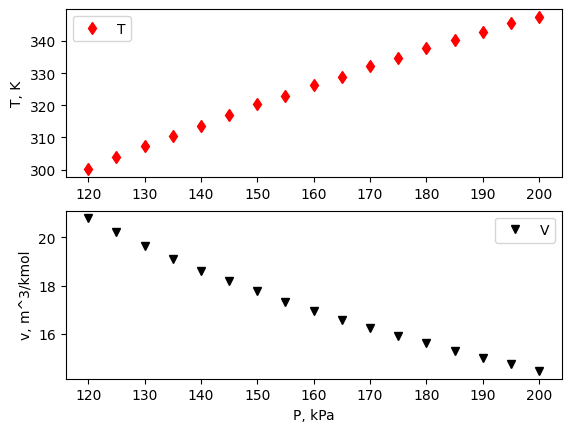

In [15]:
#grafiquemos T vs P y V vs P
plt.figure
plt.subplot(2,1,1)
plt.plot(P,T,'dr')
plt.legend('Temperatura vs P')
plt.ylabel('T, K')
# ahora V vs P
plt.subplot(2,1,2)
plt.plot(P,V,'vk')
plt.legend('Volumen molar vs P')
plt.xlabel('P, kPa')
plt.ylabel('v, m^3/kmol')
plt.show

In [29]:
#Interpolemos en los datos. 
P_new=np.linspace(P[0],P[-1],100)
T_new=np.interp(P_new,P,T)
V_new=np.interp(P_new,P,V)

In [30]:
np.shape(V_new)

(100,)

In [28]:
P_new.shape

(100,)

<function matplotlib.pyplot.show(close=None, block=None)>

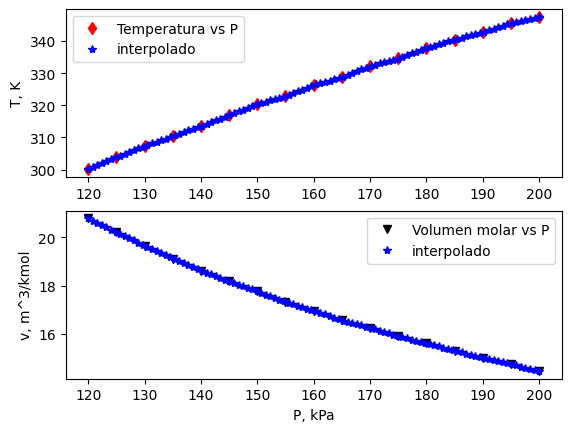

In [35]:
#grafiquemos T vs P y V vs P
plt.figure
plt.subplot(2,1,1)
plt.plot(P,T,'dr',P_new,T_new,'*b')
plt.legend(['Temperatura vs P','interpolado'])
plt.ylabel('T, K')
# ahora V vs P
plt.subplot(2,1,2)
plt.plot(P,V,'vk',P_new,V_new,'*b')
plt.legend(['Volumen molar vs P','interpolado'])
plt.xlabel('P, kPa')
plt.ylabel('v, m^3/kmol')
plt.show

In [36]:
#Hallemos el trabajo de compresión isentrópico. Esta es la integral del volumen respecto a la presión
w_isen=np.trapz(V,P)
w_isen_new=np.trapz(V_new,P_new)
print("el trabajo isentropico usando los datos originales es {}".format(w_isen))
print("el trabajo isentropico usando los datos interpolados es {}".format(w_isen_new))

el trabajo isentropico usando los datos originales es 1373.934190875
el trabajo isentropico usando los datos interpolados es 1373.937729090705


In [40]:
#El trabajo isentrópico calculado teóricamente es
k=1.4
R=8.314
T2=T[-1]
T1=T[0]

w_teorico=k*R*(T2-T1)/(k-1)
w_teorico

1382.49349

In [48]:
#ajustar un polinomio a T(P)
T_P_poli=np.polyfit(P,T,4)

In [49]:
T_P_poli

array([-4.76462650e-07,  3.02706994e-04, -7.27261173e-02,  8.42841194e+00,
       -8.83205366e+01])

In [50]:
#graficar este polinomio junto a los datos originales
T_poli=np.polyval(T_P_poli,P_new)

Text(0, 0.5, 'T, K')

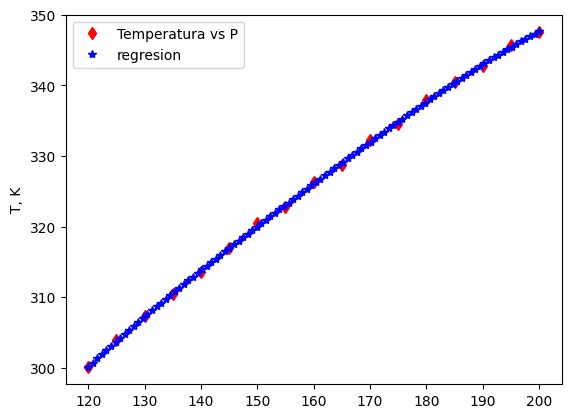

In [51]:
plt.figure
plt.plot(P,T,'dr',P_new,T_poli,'*b')
plt.legend(['Temperatura vs P','regresion'])
plt.ylabel('T, K')